# 📊 **Performing Exploratory Data Analysis (EDA)**

In this section, I will be exploring the NovaPay transaction dataset to uncover meaningful patterns, trends, and anomalies.  
The goal of EDA is to better understand the structure of the data, identify potential issues, and generate insights that will guide model development for fraud detection.

Key steps include:
- **Data Profiling**: Checking column types, missing values, and overall dataset quality.
- **Statistical Summaries**: Reviewing distributions of transaction amounts, fees, and exchange rates.
- **Pattern Discovery**: Exploring relationships between source and destination currencies, channels, and countries.
- **Fraud Indicators**: Identifying unusual behaviours or anomalies that may signal fraudulent activity.
- **Visualization**: Using plots and charts to make patterns clearer and more intuitive.

This analysis provides the foundation for building robust machine learning models by ensuring we fully understand the data before applying algorithms.


# Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
master_df = pd.read_csv('/content/drive/MyDrive/NovaPay_Fraud_Predictive_Model/nova_master_df.csv')

In [4]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10900 entries, 0 to 10899
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 10900 non-null  int64  
 1   transaction_id             10900 non-null  object 
 2   customer_id                10900 non-null  object 
 3   timestamp                  10900 non-null  object 
 4   home_country               10900 non-null  object 
 5   source_currency            10900 non-null  object 
 6   dest_currency              10900 non-null  object 
 7   channel                    10900 non-null  object 
 8   amount_src                 10900 non-null  float64
 9   amount_usd                 10900 non-null  float64
 10  fee                        10900 non-null  float64
 11  exchange_rate_src_to_dest  10900 non-null  float64
 12  device_id                  10900 non-null  object 
 13  new_device                 10900 non-null  boo

In [5]:
master_df['timestamp'] = pd.to_datetime(master_df['timestamp'], errors='coerce')    # converting to datetime data type
master_df['date_only'] = pd.to_datetime(master_df['date_only'], errors='coerce')
master_df['time_only'] = pd.to_datetime(master_df['time_only'], errors='coerce')

In [6]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10900 entries, 0 to 10899
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Unnamed: 0                 10900 non-null  int64         
 1   transaction_id             10900 non-null  object        
 2   customer_id                10900 non-null  object        
 3   timestamp                  10900 non-null  datetime64[ns]
 4   home_country               10900 non-null  object        
 5   source_currency            10900 non-null  object        
 6   dest_currency              10900 non-null  object        
 7   channel                    10900 non-null  object        
 8   amount_src                 10900 non-null  float64       
 9   amount_usd                 10900 non-null  float64       
 10  fee                        10900 non-null  float64       
 11  exchange_rate_src_to_dest  10900 non-null  float64       
 12  devi

In [7]:
master_df.head(2)

,Unnamed: 0,transaction_id,customer_id,timestamp,home_country,source_currency,dest_currency,channel,amount_src,amount_usd,...,corridor_risk,is_fraud,amount_dest,date_only,time_only,days_only,period_of_the_day,fee_bracket,ip_risk_score_bracket,device_trust_bucket
0,0,fee8542d-8ee6-4b0d-9671-c294dd08ed26,402cccc9-28de-45b3-9af7-cc5302aa1f93,2022-10-03 18:40:59,US,USD,CAD,ATM,278.19,278.19,...,0.0,False,375.932335,2022-10-03,1900-01-01 18:40:59,Monday,Evening,no risk,no risk,no risk
1,1,bfdb9fc1-27fe-4a85-b043-4d813d679259,67c2c6b3-ef0a-4777-a3f1-c84a851bb6ad,2022-10-03 20:39:38,CA,CAD,MXN,WEB,208.51,154.29,...,0.0,False,2660.300065,2022-10-03,1900-01-01 20:39:38,Monday,Evening,no risk,no risk,no risk


In [8]:
is_fraud_count = master_df['is_fraud'].value_counts().reset_index()
is_fraud_count.columns = ['is_fraud', 'count']
is_fraud_count

,is_fraud,count
0,False,9912
1,True,988


In [9]:
master_df.groupby('source_currency')['is_fraud'].value_counts().reset_index(name='count')

,source_currency,is_fraud,count
0,CAD,False,1006
1,CAD,True,185
2,GBP,False,1765
3,GBP,True,280
4,USD,False,7141
5,USD,True,523


In [10]:
master_df.groupby('dest_currency')['amount_src'].sum().reset_index(name='total_amount')

,dest_currency,total_amount
0,CAD,568367.30
1,CNY,520831.63
2,EUR,503699.09
3,GBP,470658.33
4,INR,597729.38
5,MXN,387467.05
6,NGN,746954.24
7,PHP,571853.61
8,USD,497174.11


In [11]:
master_df.groupby('source_currency')['amount_src'].sum().reset_index(name='total_amount')

,source_currency,total_amount
0,CAD,616646.61
1,GBP,876676.06
2,USD,3371412.07


#

- Distribution of transaction amounts

<Axes: xlabel='source_currency', ylabel='Count'>

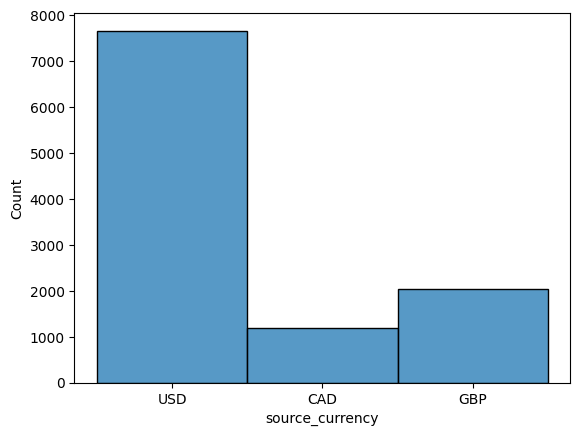

In [12]:
sns.histplot(data=master_df, x= 'source_currency')

<Axes: xlabel='dest_currency', ylabel='Count'>

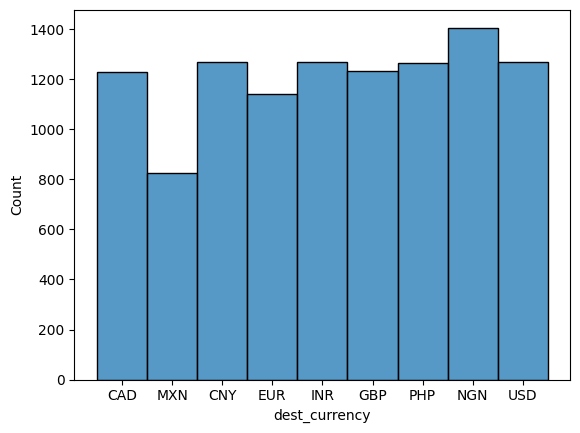

In [13]:
sns.histplot(data=master_df, x= 'dest_currency')

In [14]:
master_df['channel'].value_counts()

,count
channel,
MOBILE,6240
WEB,3686
ATM,974


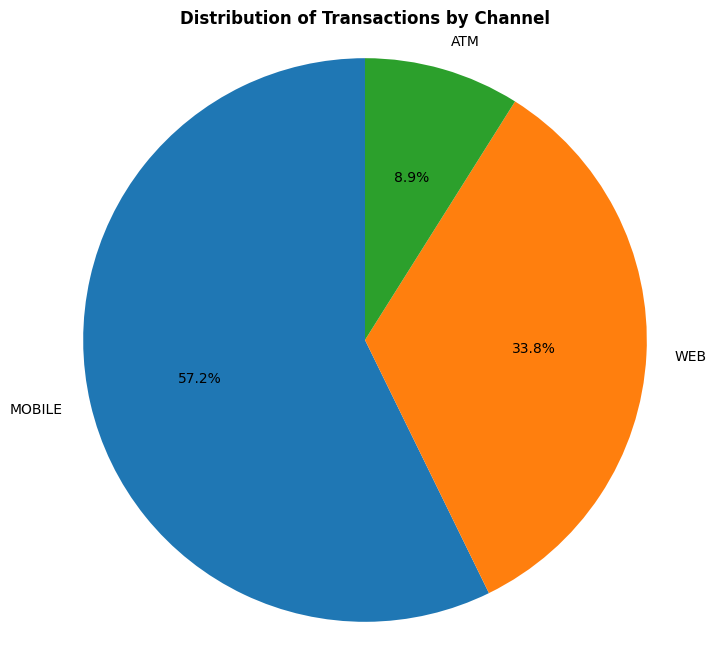

In [15]:
plt.figure(figsize=(8, 8))
plt.pie(master_df['channel'].value_counts(), labels=master_df['channel'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Transactions by Channel', weight='bold')
plt.show();

#

- Fee distribution

<Axes: xlabel='fee', ylabel='Count'>

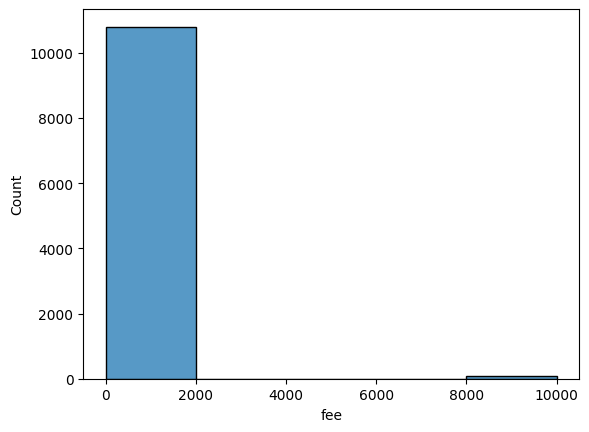

In [16]:
sns.histplot(data=master_df, x= 'fee', bins=5)

In [17]:
master_df.columns

Index(['Unnamed: 0', 'transaction_id', 'customer_id', 'timestamp',
       'home_country', 'source_currency', 'dest_currency', 'channel',
       'amount_src', 'amount_usd', 'fee', 'exchange_rate_src_to_dest',
       'device_id', 'new_device', 'ip_address', 'ip_country',
       'location_mismatch', 'ip_risk_score', 'kyc_tier', 'account_age_days',
       'device_trust_score', 'chargeback_history_count', 'risk_score_internal',
       'txn_velocity_1h', 'txn_velocity_24h', 'corridor_risk', 'is_fraud',
       'amount_dest', 'date_only', 'time_only', 'days_only',
       'period_of_the_day', 'fee_bracket', 'ip_risk_score_bracket',
       'device_trust_bucket'],
      dtype='object')

#

- Exchange rate distribution

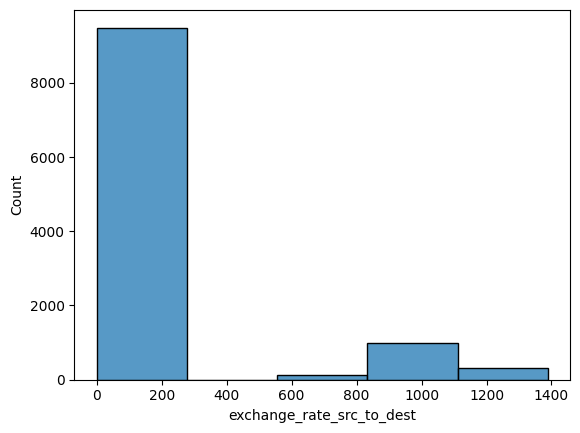

In [18]:
sns.histplot(data=master_df, x= 'exchange_rate_src_to_dest', bins=5)
plt.show();